# Necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

# Understanding the data more

In [3]:
print(train_df.shape)
print(test_df.shape)
print(sub.shape)

(8693, 14)
(4277, 13)
(4277, 2)


In [4]:
print(f'{train_df.info()}')
print(f'Column Names : {train_df.columns}')
print(f'For Null checking :{train_df.isnull().sum()}')
print(f'For Duplicates : {train_df.duplicated().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
Column Names : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
for column in train_df.columns:
    print(f'{column} = {train_df[column].unique()}')
    print('-'*50)

PassengerId = ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
--------------------------------------------------
HomePlanet = ['Europa' 'Earth' 'Mars' nan]
--------------------------------------------------
CryoSleep = [False True nan]
--------------------------------------------------
Cabin = ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
--------------------------------------------------
Destination = ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
--------------------------------------------------
Age = [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
--------------------------------------------------
VIP = [False True nan]
-------------------------------------------------

# EDA

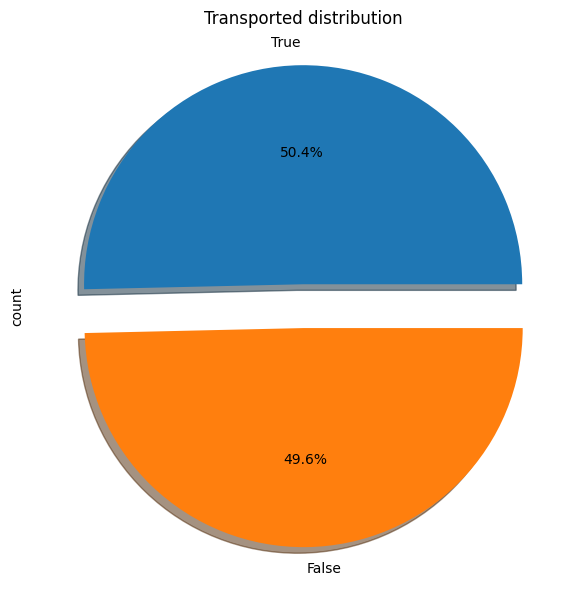

In [9]:
plt.figure(figsize = (8,6))
train_df['Transported'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0.1,0.1], shadow = True).set_title('Transported distribution')
plt.tight_layout()
plt.show()


In [10]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

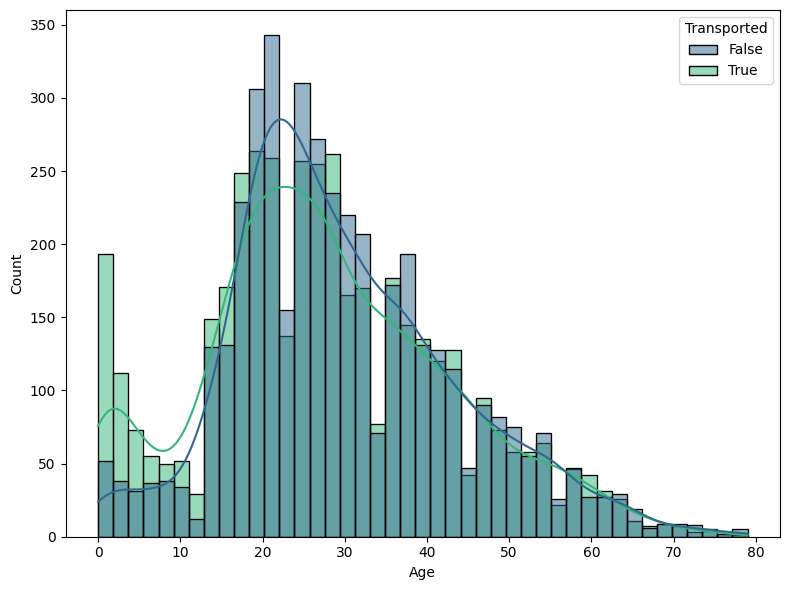

In [11]:
plt.figure(figsize = (8,6))
sns.histplot(x = 'Age', hue = 'Transported', palette = 'viridis', kde = True, data = train_df)
plt.tight_layout()
plt.show()

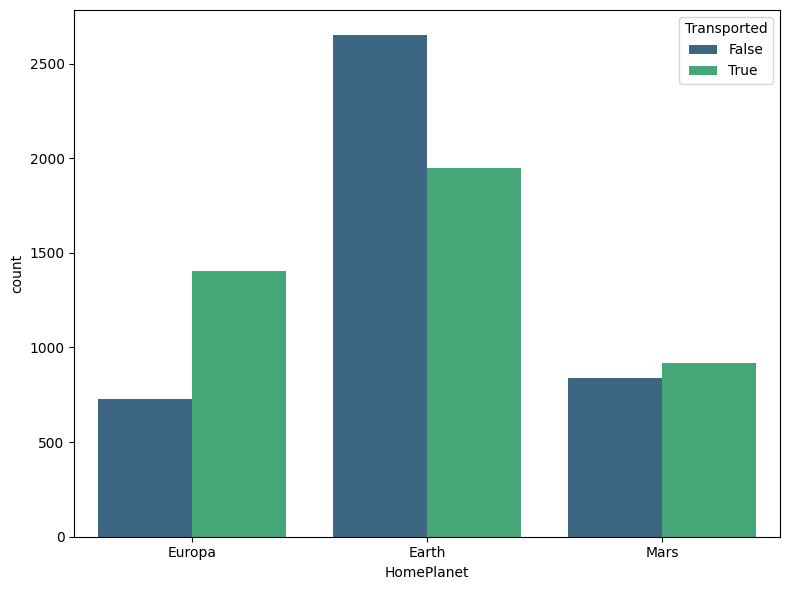

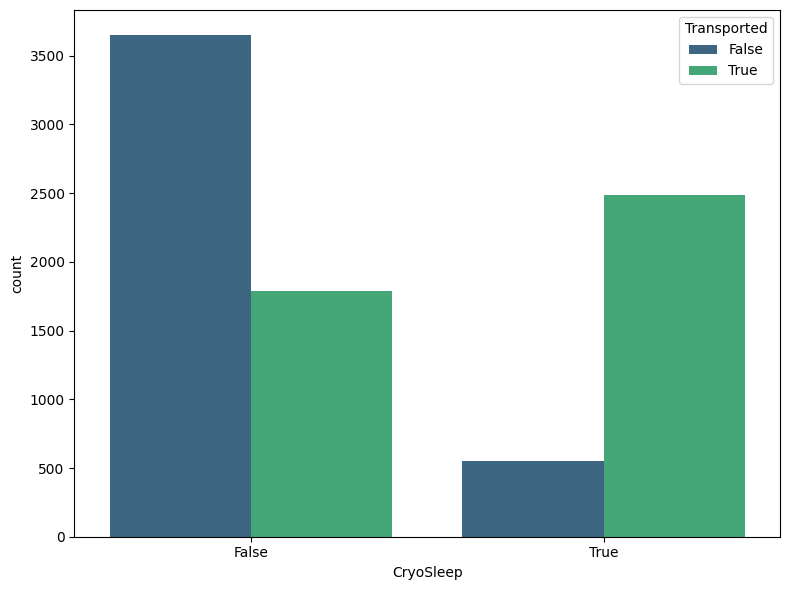

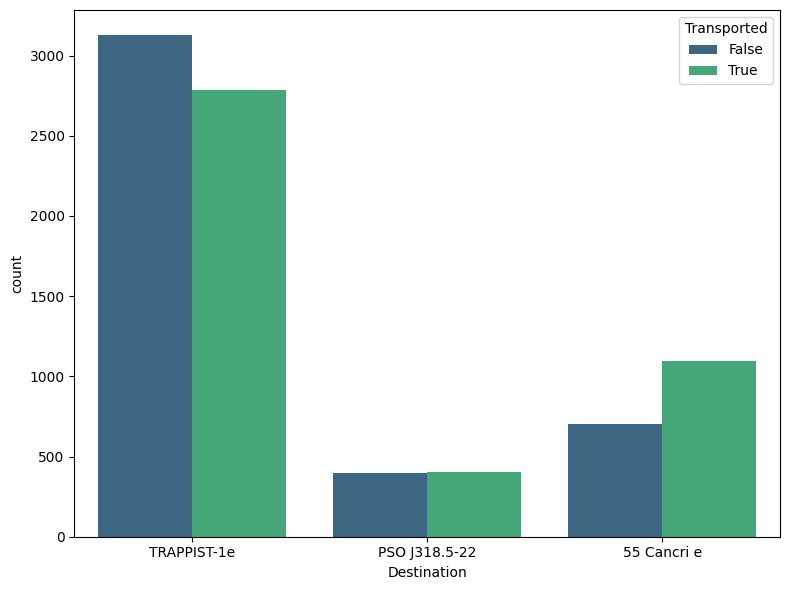

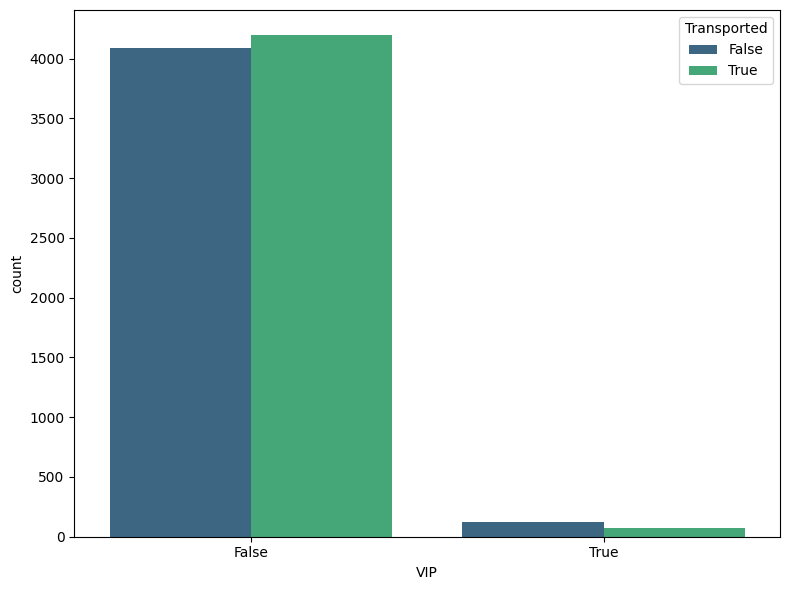

In [12]:
categorical_col = [
    'HomePlanet',
    'CryoSleep',
    'Destination',
    'VIP'
]

for column in categorical_col:
    plt.figure(figsize = (8,6))
    sns.countplot(x = column, data = train_df, hue = train_df['Transported'], palette='viridis')
    plt.tight_layout()
    plt.show()

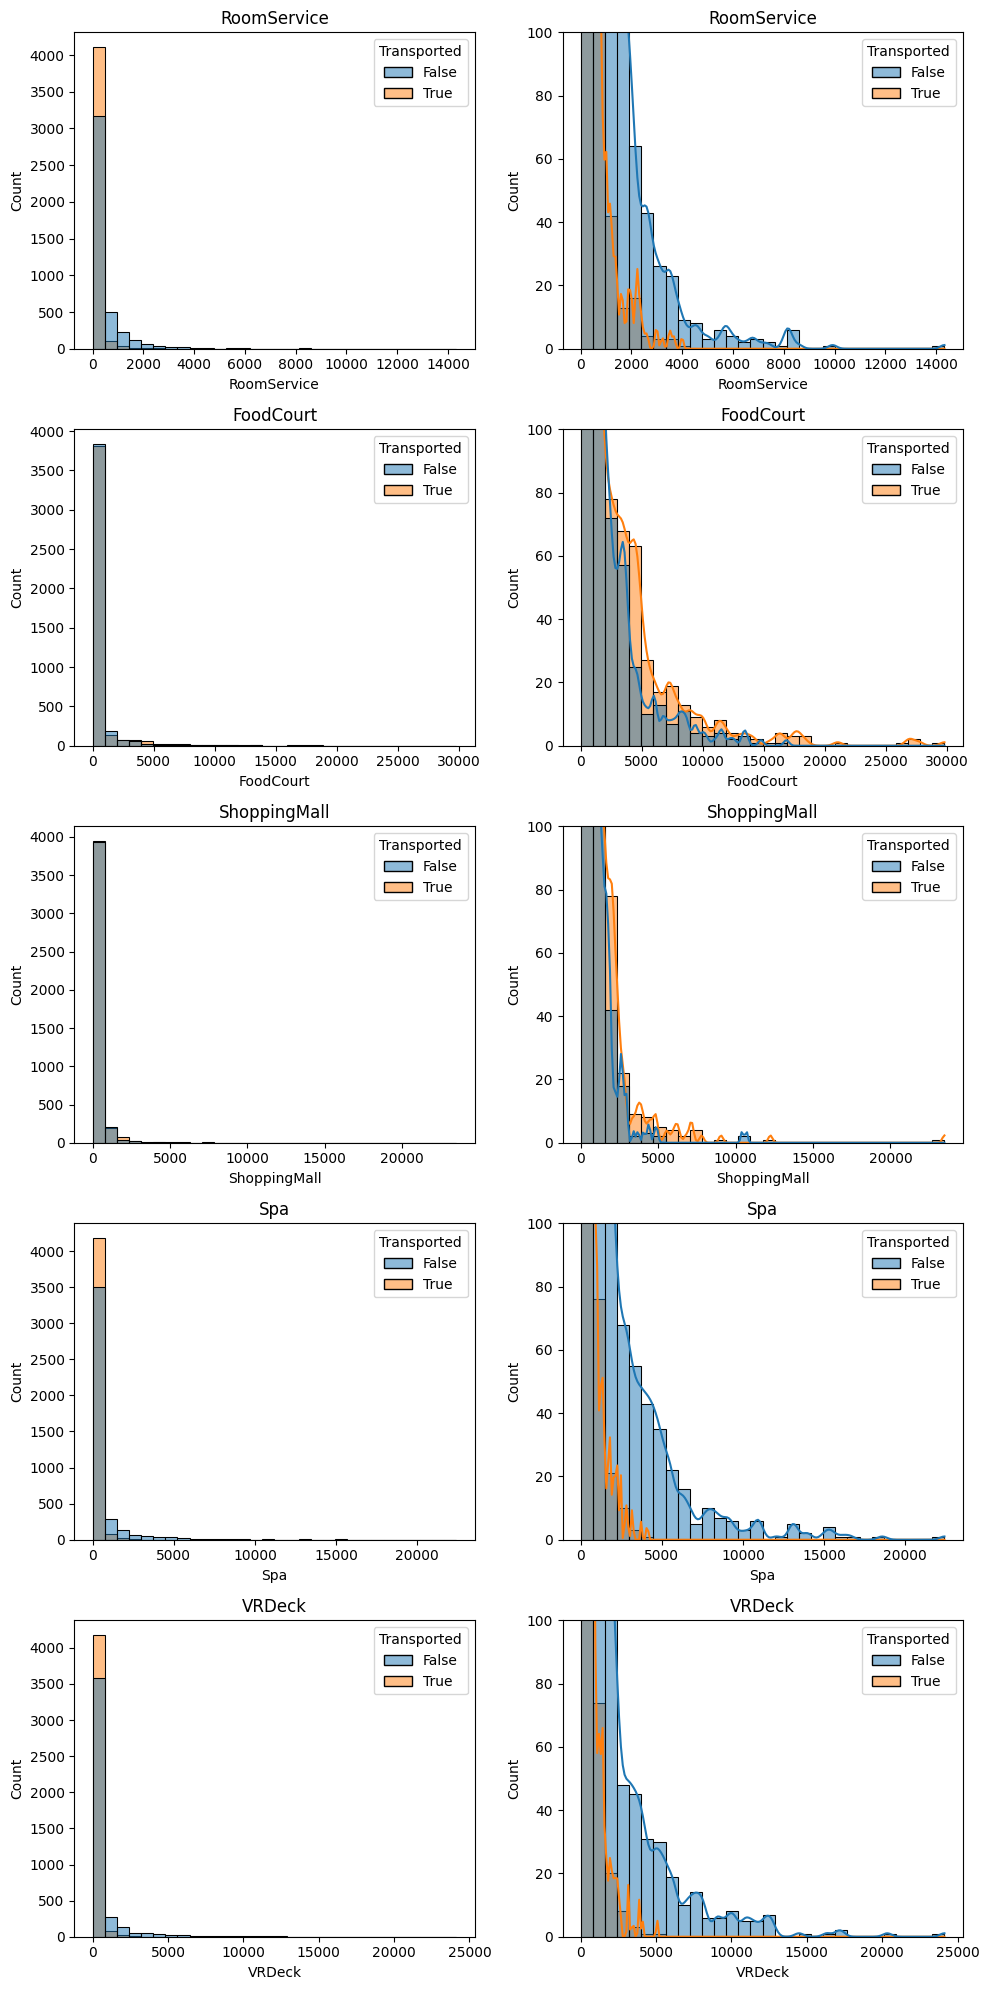

In [14]:
exp_col = [
     'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

fig = plt.figure(figsize=(10,20))

for i , item in enumerate(exp_col):
    # left side
    ax = plt.subplot(5,2,i*2+1)
    sns.histplot(data=train_df, axes = ax , x = item, bins=30, kde = False, hue = "Transported")
    ax.set_title(item)

    # right side
    ax = plt.subplot(5,2 ,2*i+2)
    sns.histplot(data=train_df, axes = ax , x = item, bins=30, kde = True, hue = "Transported")
    plt.ylim([0,100])
    ax.set_title(item)
plt.tight_layout()
plt.show()